<a href="https://colab.research.google.com/github/ambika1us/Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<B><H1>Project Title: Sales Prediction: Predicting sales of a store chain Rossmann</B></H1>

<B>Problem Description</B>
<P>Rossmann operates over 3000 drug store in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance, store sales are influenced by many factors including promotions, competition, school and state holidays, seasonality and locality, With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.</P>
<P>You are provided with historical sales data for 1115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbisment</P>


<P><B>Data Description</B></P>
<P><LI>Rossmann Store Data.csv - Historical data including Sales</LI><LI>store.csv - supplemental information about the store</LI></P>

<P>Data Fields</P>
<P>Most of the fields are self-explanatory</P>
<LI><b>id: </b>an Id that represent a duple within the set</LI>
<LI><b>Store: </b>a unique Id for each store</LI>
<LI><b>Sales: </b>the turnover for any given day</LI>
<LI><b>Customers: </b>the number of customers on a given day</LI>
<LI><b>Open: </b>an indicator for whether the store was open. 0=Closed 1=Open</LI>
<LI><b>StateHoliday: </b>indicates a state holiday. Normally all stores, with few exceptions are closed on state holidays Note all school are closed on public holiday and weekends. a=public holiday, b=easter holiday, c=christmas, 0=none</LI>
<LI><b>SchoolHoliday: </b>indicates if the store was affected by the closure of public schools</LI>
<LI><b>StoreType: </b>differentiatesbetween 4 different store models a,b,c,d</LI>
<LI><b>Assortment: </b>descibes an assortment level, a=basic, b=extra, c=extended, An assortmet strategy in retailing involves the number and type of products that store display for purchase by customer</LI>
<LI><b>CompetitionDistance: </b>distance in meters to the nearest competitor store</LI>
<LI><b>CompetitionOpenSince: </b>given the approximate year and month of the time the nearest competitor was opened</LI>
<LI><b>Promo: </b>indicates whether a store is running a promo on that day</LI>
<LI><b>Promo2: </b>promo2 is a continuing and consecutive promotion for some stores, 0=store is not participating, 1=store is participating</LI>
<LI><b>Promo2Since: </b>describes the year and calendar week when the store started participating in promo2</LI>
<LI><b>PromoInterval: </b>describe the consecutive interval promo2 is started naming the months the promotion is started a new</LI>

<p><b>Business Problem</b></p>
<p>The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same</p>
<p>Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.</p>

<p><b>Approach</b></p>
<li>Business Problem</li>
<li>Data Collection and Preprocessing</li>
<li>Exploratory Data Analysis</li>
<li>Feature selection and outlier detection</li>
<li>Modeling</li>
<li>Model Performance and Evaluation</li>
<li>Storewise sale predicting</li>
<li>Conclusion and Recommendations</li>

In [1]:
from matplotlib import figure
#importing important libraries and module
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h3>Data Collection and Preprocessing</h3>

In [3]:
#reading the csv file and converting it to pandas dataframe
sales_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone_Project_Regression/Retail Sales Prediction/Rossmann Stores Data.csv")
store_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone_Project_Regression/Retail Sales Prediction/store.csv")

In [4]:
#We have historical sales data and stores datasets
#first look of the sales data
sales_df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
#first look of the store data
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
#info about the sales dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There are 1017209 rows or observations and 9 columns in this dataset. There seems to be no null values in it. It has integer, datetime and object as data type

In [7]:
#info about the store dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are 1115 rows and 10 columns. There are missing values in it and it is important to impute them with appropriate values in order to get good result later on.

<h4>Missing Data Handling</h4>

In [8]:
#null values in store dataset
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Out of 1115 entries there are missing values for the columns
<li>CompetitionDistance: distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distance at which generally the store are opened and we would impute the values accordinigly.</li>
<li>CompetitionOpenSinceMonth:Gives the approximate month of the time the nearest competition was opened, mode of the column would tell us the most rccuring month.</li>
<li>CompetitionOpenSinceYear: gives the approximate year of the time the nearest competition was opened, mode of the column would tell us the most occuring month</li>
<li>Promo2SinceWeek,Promo2SinceYear and PromoInterval are NaN wherever promo2 is 0 or false as can be seen in the first look of the dataset. They can be replaced with 0</li>

Text(0.5, 0, 'Competition Distance Distribution Plot')

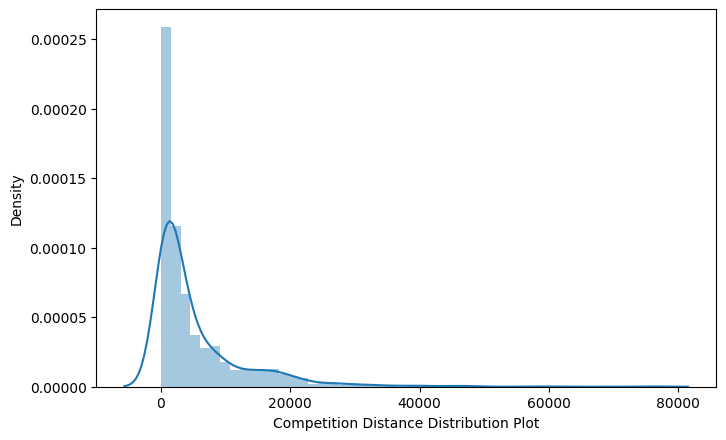

In [9]:
#distribution plot of competition distance
sns.distplot(x=store_df['CompetitionDistance'],hist=True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier affect.

In [10]:
#filling competition distance with the median value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)

In [11]:
#filling competition open since month and year with the most occuring values of the column i.e. modes of those columns
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace=True)


In [12]:
#imputing the NaN values of promo2 related columns with 0
store_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_df['Promo2SinceYear'].fillna(value=0,inplace=True)
store_df['PromoInterval'].fillna(value=0,inplace=True)

In [13]:
#check
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Merging the two Datasets

In [14]:
#Merge the datasets on stores data
df=sales_df.merge(right=store_df,on="Store",how="left")

In [15]:
#first five rows of the merged dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [16]:
#shape of the Dataset

df.shape

(1017209, 18)

Unique valus in Categorical Features

In [17]:
#datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [18]:
#Creating a categorical column list
categorical_variables=['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [19]:
#Checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}:{df[col].unique()}')

Unique values for DayOfWeek:[5 4 3 2 1 7 6]
Unique values for Open:[1 0]
Unique values for Promo:[1 0]
Unique values for StateHoliday:['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday:[1 0]
Unique values for StoreType:['c' 'a' 'd' 'b']
Unique values for Assortment:['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth:[ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear:[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2:[0 1]
Unique values for Promo2SinceWeek:[ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear:[   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval:[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [20]:
#Change into int type
df['StateHoliday'].replace({'0':0},inplace=True)

<h3>Exploratory Data Analysis</h3>
<p>EDA is a crusial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusion to make better decisions related to the data. Often using statistical graphics and other data visualization tools to summarize the result. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it. It includes analyzing what our dataset consists of. Exploring continous as well as categorical variables and their influence on our dependent variable 'Sales'</p>
<h4>Hypotheses</h4>
<p>Just by observing the head of the dataset and understanding the features involved in it. the following hypotheses could be framed</p>
<ol>
<li>There's a feature called "DayOfWeek" with the calues 1-7 denotes each day of week. There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.</li>
<li>Customers would have a positive correlation with sales.</li>
<li>The store type and Assortment strategy involved would be having a certain effect on sales as well some premium high quality products would fetch more revenue.</li>
<li>Promotion should be having a positive correlation.</li>
<li>Some stores were closed due to refurbishment those would generate 0 revenue for that time period.</li>
<li>Stores are influenced by seasonality probably before holidays sales would be high.</li>
</ol>
<p>Next step is to explore and see in a data driven way about the factory influencing Rossmann store sales and how.</p>

<h4><B>Categorical Features:</B></h4>

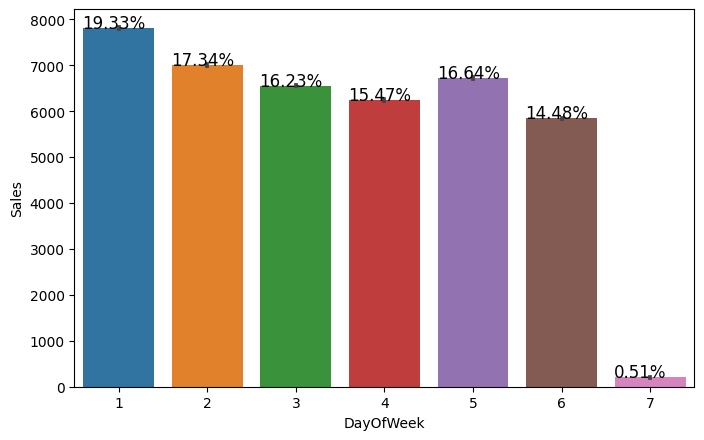

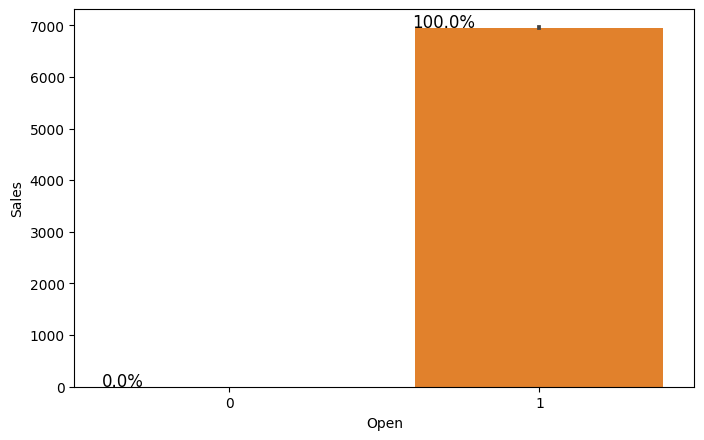

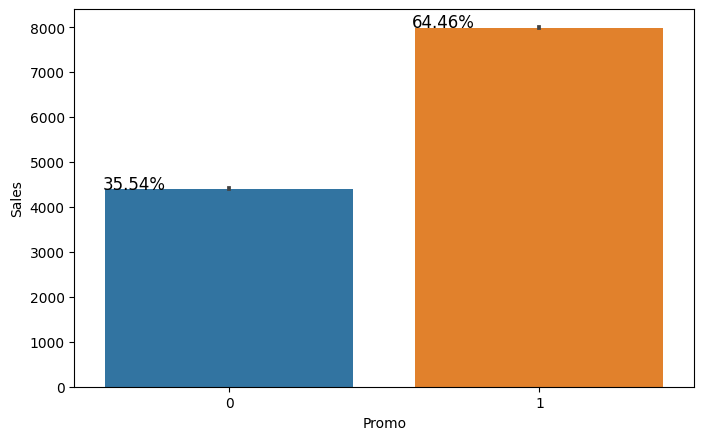

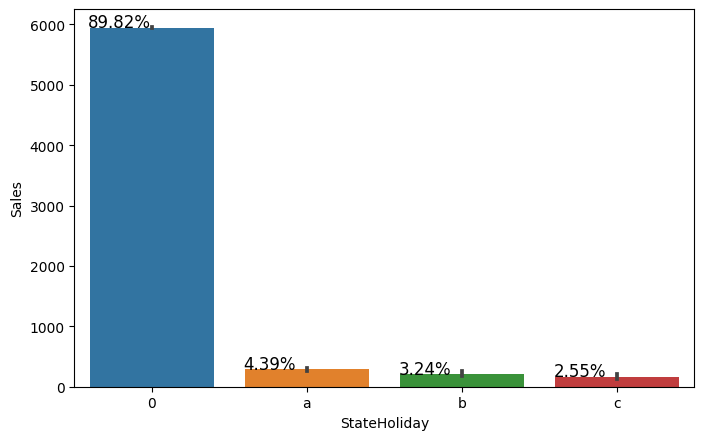

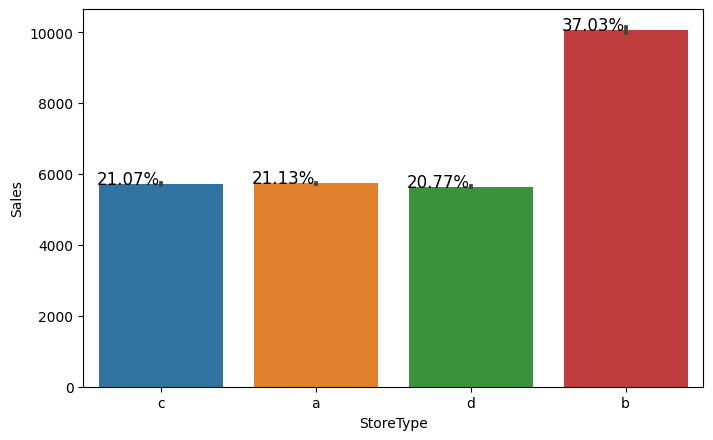

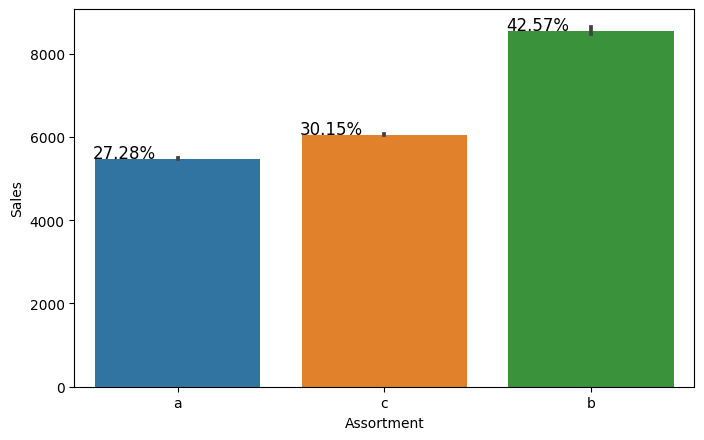

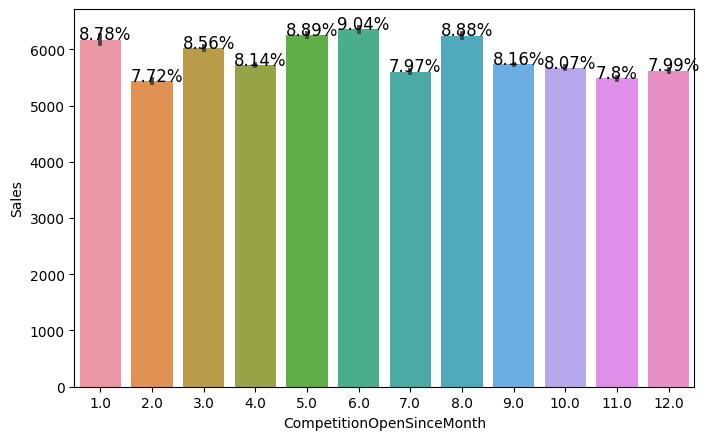

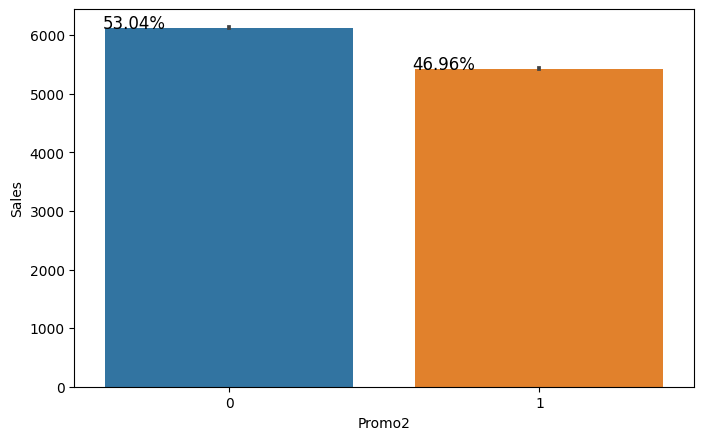

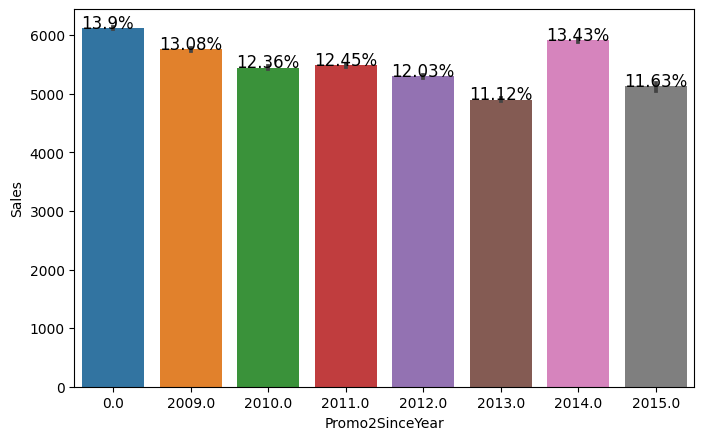

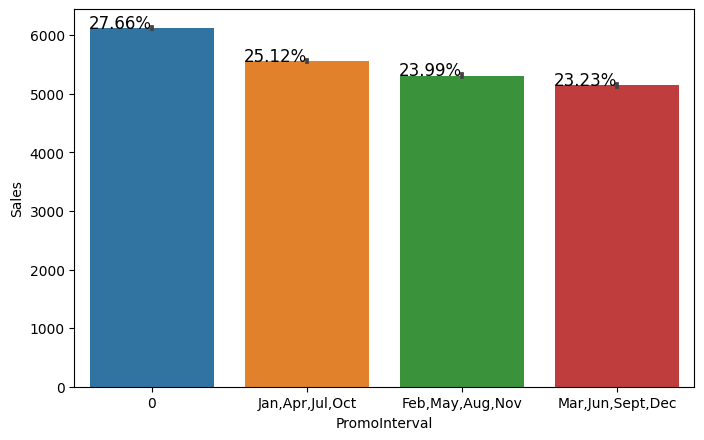

In [21]:
#Code for barplots of the categorical variables aganist sales
#Iterating over the categorical variables and plotting each of them
categorical_variables=['DayOfWeek','Open','Promo','StateHoliday','StoreType','Assortment','CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax=sns.barplot(x=df[value],y=df['Sales'])
  totals=[]
  for i in ax.patches: #for every patch in the barplot ax
    totals.append(i.get_height()) #append height for each patch
  
  total=sum(totals) # sum of each patch height for a plot
  
  for i in ax.patches:
    ax.text(i.get_x()-.01,i.get_height()+.5,str(round((i.get_height()/total)*100,2))+'%',fontsize=12) # text position and fotmula for percentage
  plt.show()

<h4>Observation</h4>
<li>There were more sales on Monday, probably because shops generally remain closed on Sunday.</li>
<li>It could be seen that the promo leads to more sales.</li>
<li>Normally all stores with few exceptions are closed on state holidays. Note that all schools are closed on public holidays and weekends. a=public holiday, b= Easter holiday, c=christmas, 0=None. Lowest of sales were seen on state holidays especially on christmas.</li>
<li>More stores were open on school holidays than on state holidays and hence had more sales than state holidays.</li>
<li>On an average store type B had the higest sales.</li>
<li>Highest average sales were seen with Assortment levels-b which is 'Extra'.</li>
<li>With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.</li>

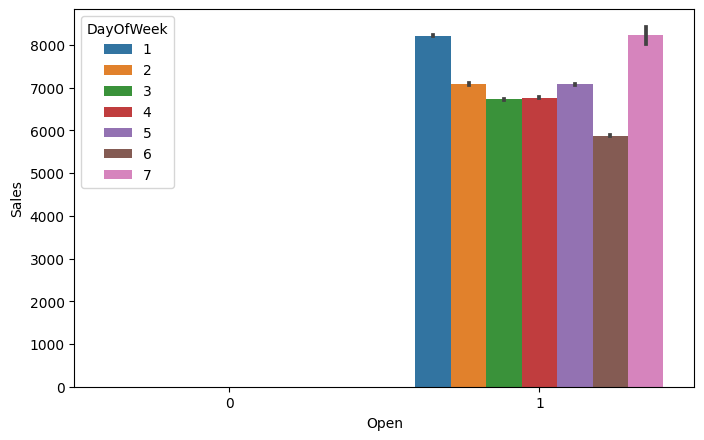

In [22]:
#Open and store type relationship
#This indicates - open suggets that whether the store was open or closed for refurbishment and weekend or holidays
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

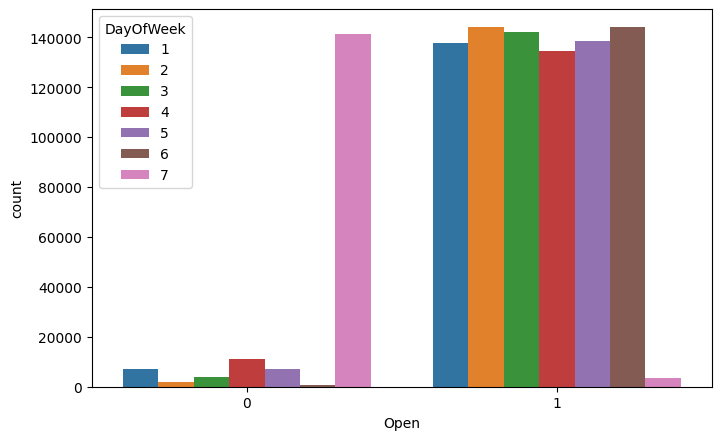

In [23]:
#Lets see open, how many shops are open on which days
#And this gives a counts of stores closed for refurbishment and suggests that most stores are closed on Sunday
sns.countplot(x=df["Open"],hue=df["DayOfWeek"])

<h5>Observation</h5>
This is a count plot of open shops according to the day of the week. Its clear that the number of shopes open on sunday were very less and hence low sales. some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays.

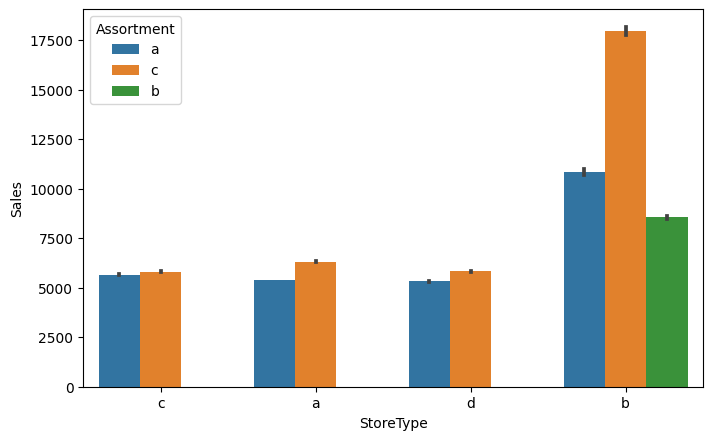

In [24]:
#Lets check the relationship between store type, assortment levels and sales
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

<h5>Observation</h5>
<p>The above bar plot shows that the store types a,c and d have only assortment level a and c. On the other hand the store type b has all the three kind of assortment strategies a reason why average sales were high for store type b stores</p>

In [25]:
#Store type and sales Exploration
store_type=df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending=False,inplace=True)#sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


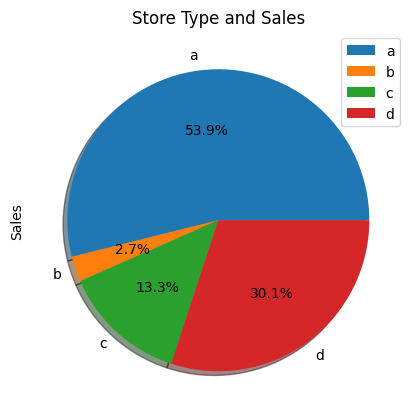

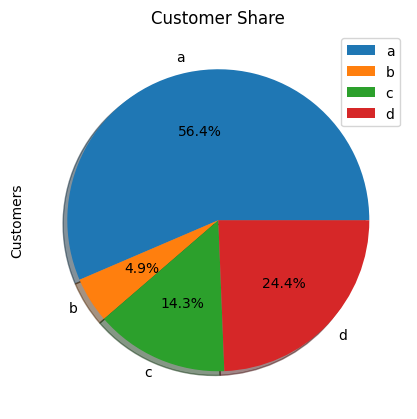

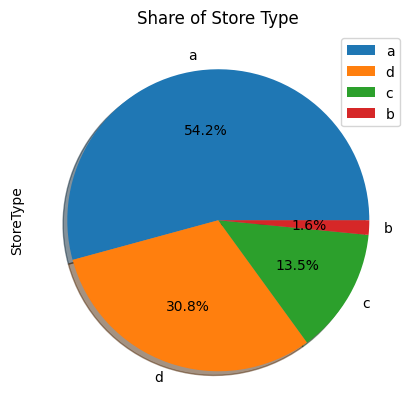

In [26]:
#Let's explore store type a bit and its influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales',legend=True,autopct='%1.1f%%',shadow=True)
plt.show()
#Customers and Store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True,autopct='%1.1f%%',shadow=True)
plt.show()
#Store type in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Type', legend=True, autopct='%1.1f%%',shadow=True)
plt.show()

<h5>Observation:</h5>
<li>A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle earlier it was seen that the store type b had the highest sales on an average because the defualt estimation function to the barplot is mean.</li>
<li>But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a store in out dataset. Store type a and c had a similar kind of sales and customer share.</li>
<li>Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.</li>

<h3>Continuous Features:</h3>

<h5>Sales with Time</h5>

In [27]:
#Creating features from the date
df['Date'] = pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear']=df['Date'].dt.weekofyear
df['DayOfYear']=df['Date'].dt.dayofyear
years=df['Year'].unique()
years

array([2015, 2014, 2013])

In [28]:
#Sales over the years
sales_df_2013=df[df['Year']==2013]
sales_df_2014=df[df['Year']==2014]
sales_df_2015=df[df['Year']==2015]

In [29]:
#Monthly sales
sales_2013=sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014=sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015=sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

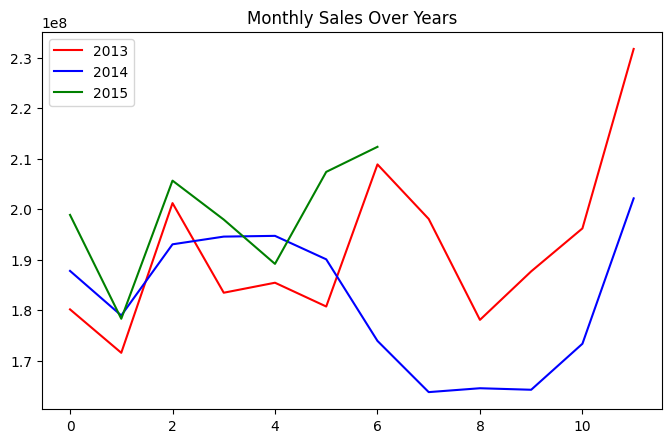

In [30]:
#Plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='red')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

<h4>Observation:</h4>
<p>Sales rise up by the end of the year before holidays. Sales for 2014 went down there for a couple of months - July to September indicating store closed due to refurbishment.</p>

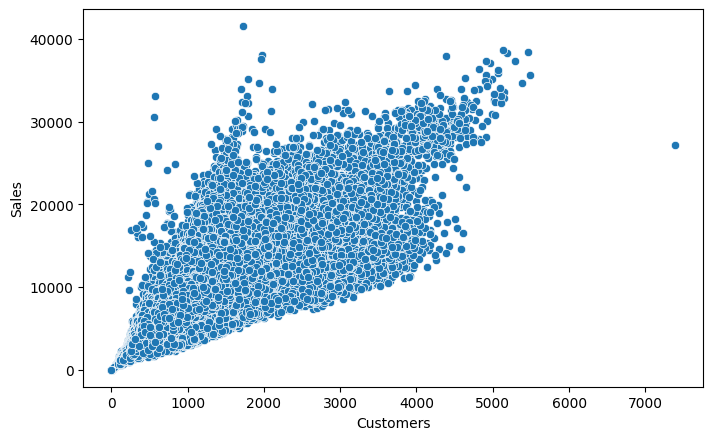

In [31]:
#Scatterplot of customers and sales
sns.scatterplot(x=df['Customers'],y=df['Sales'])

<h4>Observation:</h4>
<p>Sales and customer scatterplot shows a direct positive relation between them with a few outliers.</p>

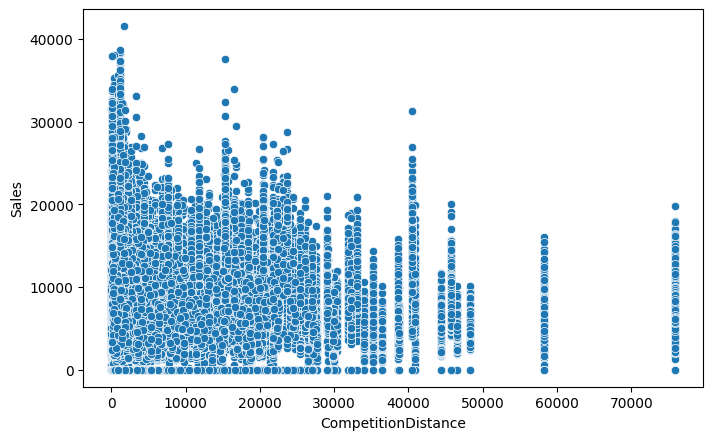

In [32]:
#Scatterplot of CompetitionDistance and Sales
sns.scatterplot(x=df['CompetitionDistance'],y=df['Sales'])

<h4>Observation:</h4>
<p>From the above scatterplot it can be observerd that mostly the competitior stores weren't that far from each other and the stores densely located near each other saw more sales.</p>

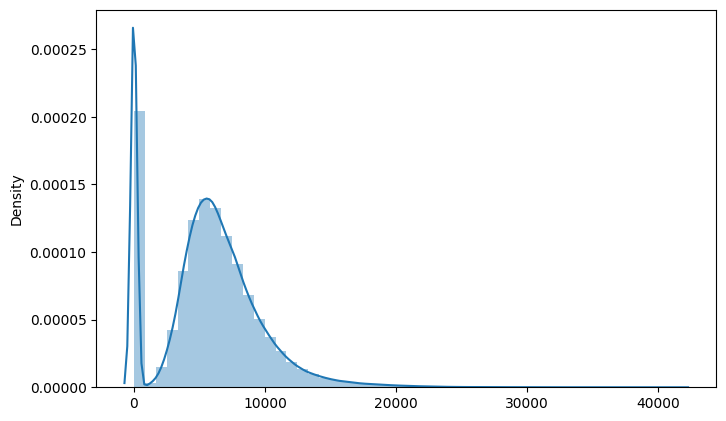

In [33]:
#Distribution plot of sales
sns.distplot(x=df['Sales'])

<h4>Observation:</h4>
<p>The drop in sales indicares the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.</p>

<h4>Correlation Matrix</h4>
<p>Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves either up or down the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions. While a zero correlation implies no linear relationship at all.</p>

<p>By checking the correlation the factors affecting sales can be figured out.</p>

In [34]:
#We need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop=['Store','Year','WeekOfYear','DayOfYear']
corr_df=df.drop(columns=columns_to_drop,axis=1)
corr_df['StateHoliday'].replace({'a':1,'b':1,'c':1},inplace=True)

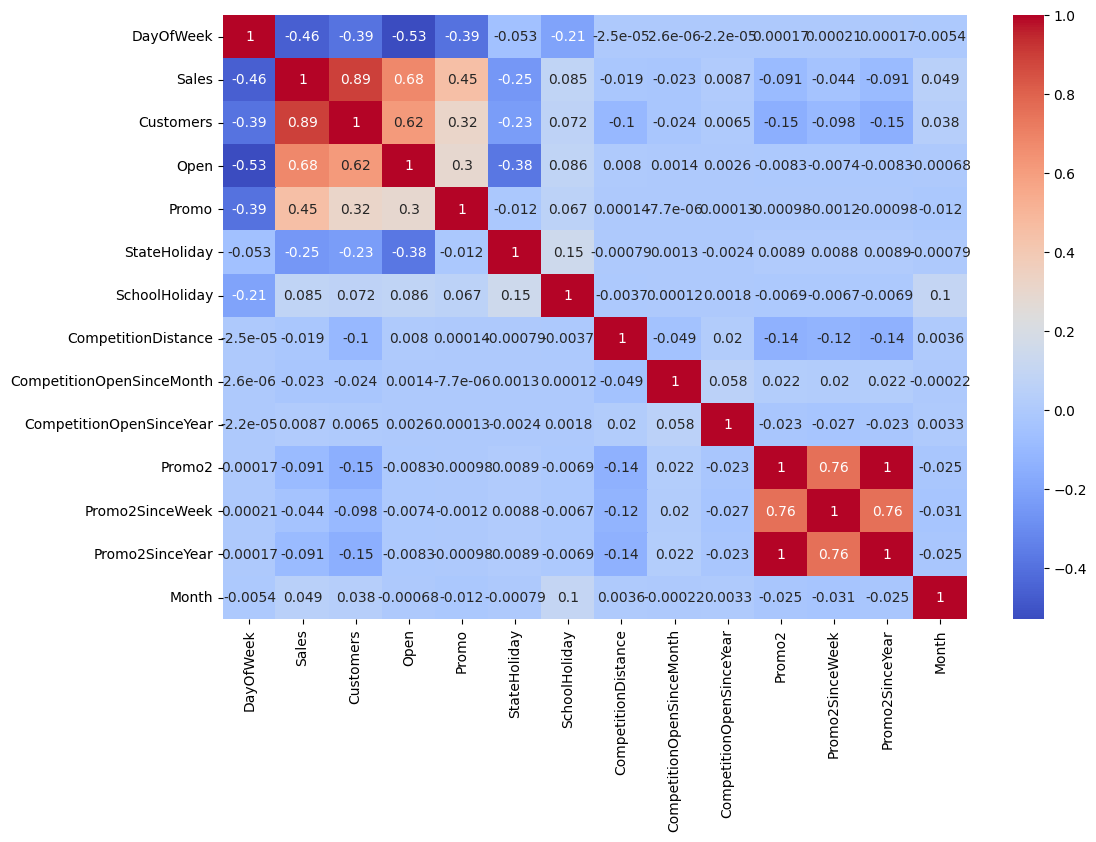

In [35]:
#Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_df.corr(),cmap="coolwarm",annot=True)

<h4>Observation:</h4>
<li>Day of week has a negative correlation indicating low sales as the weekend and promo, customers and open has positive correlation.</li>
<li>State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.</li>
<li>CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce which was also observed through the scatterplot earlier.</li>
<li>There's multicollinearity involved in the dataset as well the features telling the same story like ptomo2, promo2 since week and year are showing multicollinearity.</li>
<li>The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.</li>

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

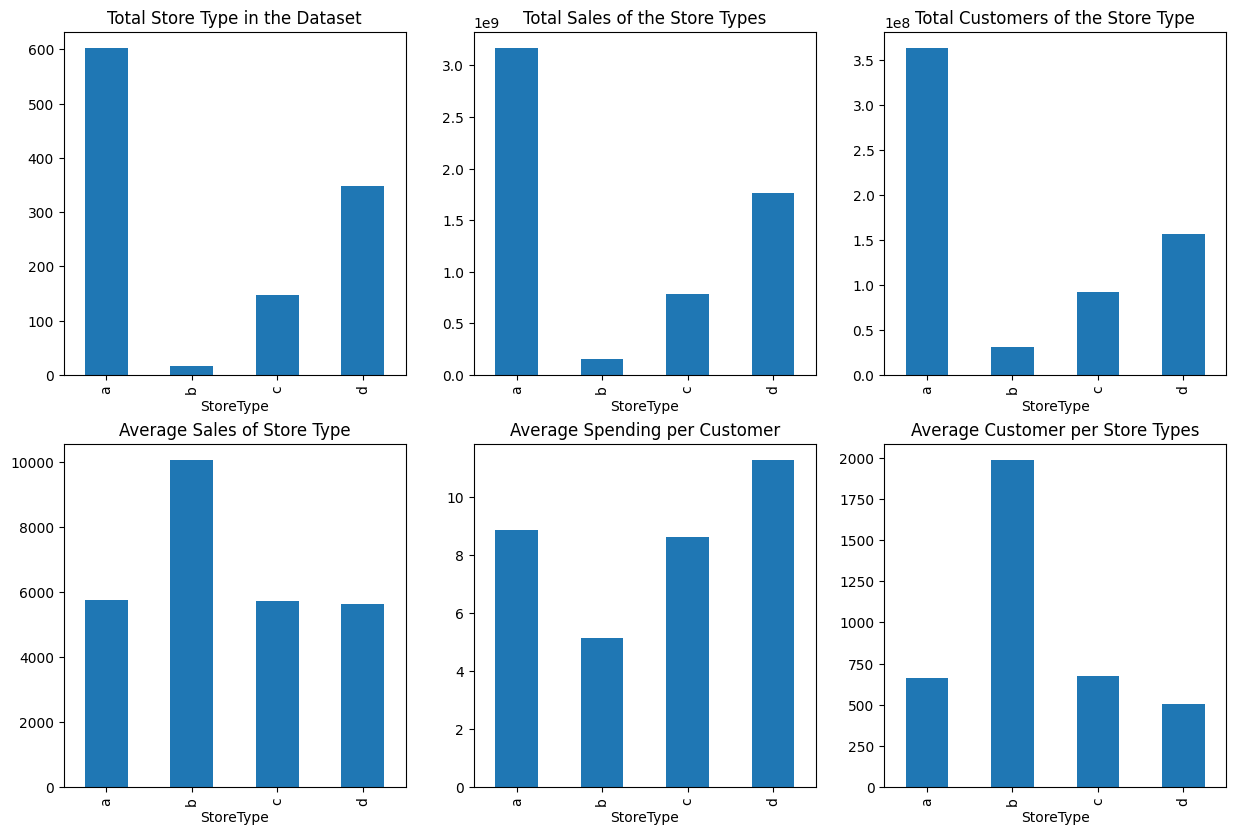

In [37]:
df["Avg_Customer_Sales"]=df['Sales']/df['Customers']
f,ax=plt.subplots(2,3,figsize=(15,10))
store_df.groupby("StoreType")["Store"].count().plot(kind="bar",ax=ax[0,0],title="Total Store Type in the Dataset")
df.groupby("StoreType")['Sales'].sum().plot(kind="bar",ax=ax[0,1],title="Total Sales of the Store Types")
df.groupby("StoreType")['Customers'].sum().plot(kind="bar",ax=ax[0,2],title="Total Customers of the Store Type")
df.groupby("StoreType")['Sales'].mean().plot(kind="bar",ax=ax[1,0],title="Average Sales of Store Type")
df.groupby("StoreType")['Avg_Customer_Sales'].mean().plot(kind="bar",ax=ax[1,1],title="Average Spending per Customer")
df.groupby("StoreType")['Customers'].mean().plot(kind="bar",ax=ax[1,2],title="Average Customer per Store Types")

As we can see from the plots, the Store Type A has the most stores, sales and customers. However the Store Type D has the best average spending per customers. Store Type B with only 17 stores has the most average customers.

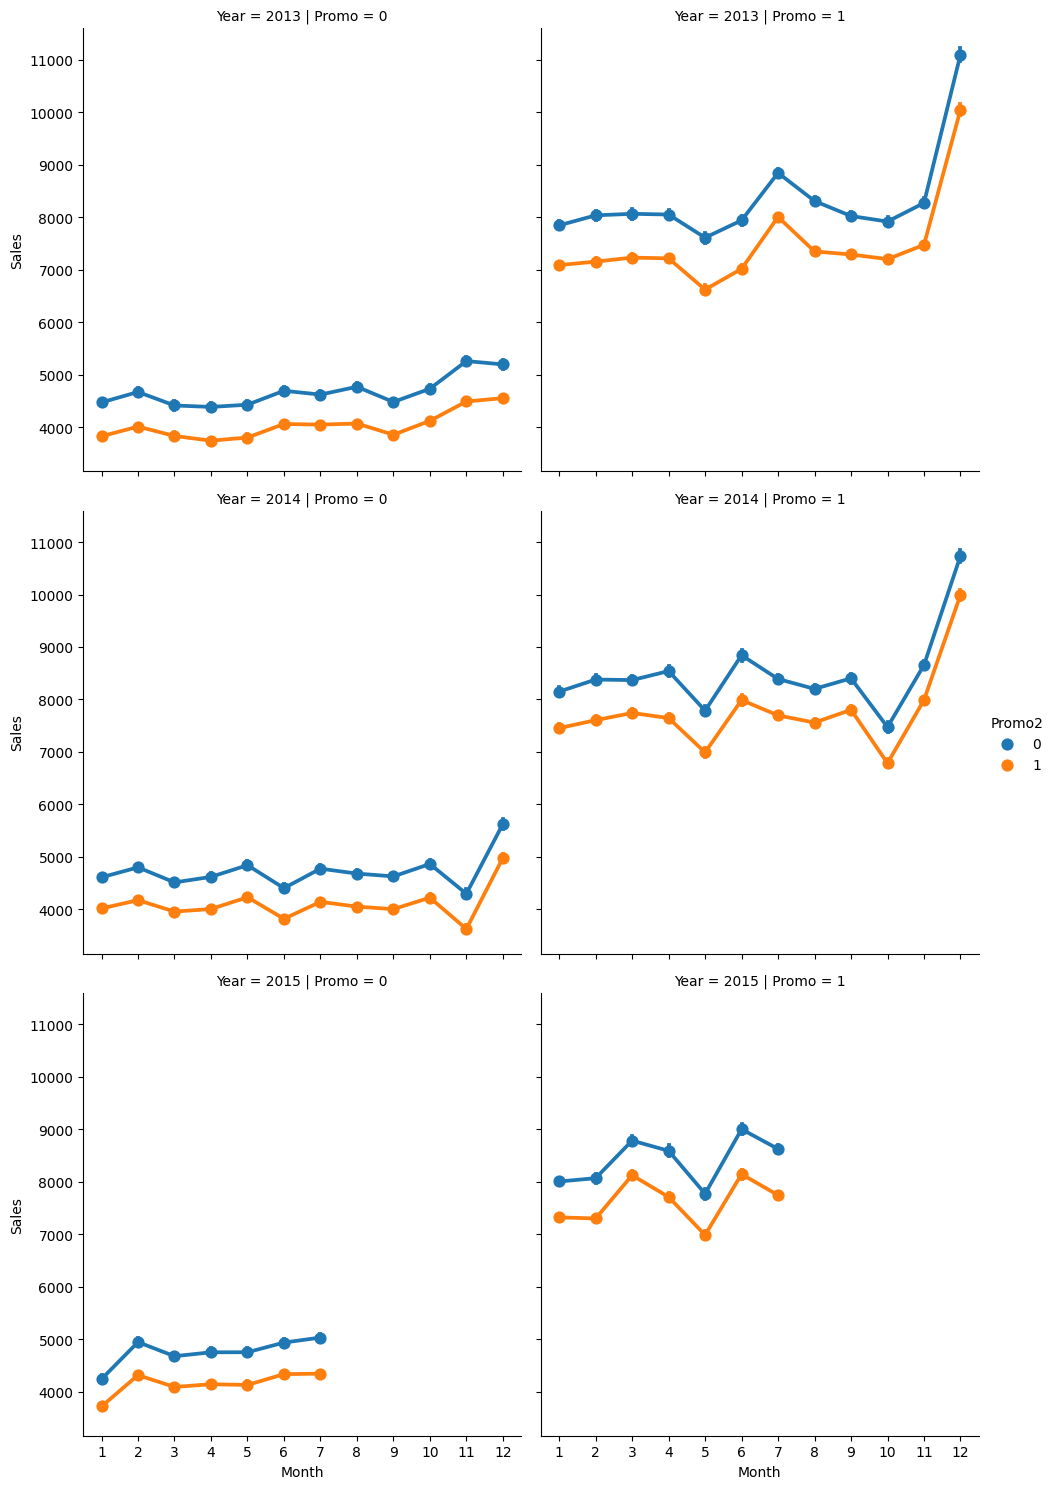

In [38]:
sns.factorplot(data=df,x="Month",y="Sales",col='Promo',hue='Promo2',row="Year")

So,if the stores are having promotion the sells are higher. Overall the store promotions selling are also higher than the seasionality promotions(Promo2). However I can't see any yearly trend.

<h4>EDA Conclusions and Hypotheses Validation:</h4>
<li>There's a positive correlation between customers and sales which is explanatory.</li>
<li>Here it can be deduced that there were more sales on Monday. Probably because shops generally remail closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.</li>
<li>The positive effect of promotion on customers and sales is observable.</li>
<li>It is clear that most of the stores remain closed during state and school holidays.</li>
But it is important to note that more stores open on School Holidays than on State Holidays and hencehad more sales than Stare Holidays.
<li>Based on the above findings it seems that there are quite a lot of opportunities in store type 'b' & 'd' as they had more number of customers per store and more sales per customer, respectively. Store type a & c are quite similar in terms of "per customer and per store" sales numbers and just because the majority of the store were of these kinds. They had the best overall revenue numbers. On the other hand, store type b were very few in number and even they had better average sale than others.</li>
<li>Earlier, it was observed that only store b had all three kinds of assortment levels and rest of the store types had two of them. it seems that in some b type stores the product were different as compared to others because the revenue per store is significantly more than the others.</li>
<li>When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. This validates the previous hypothesis.</li>
The second thing to notice was that sales dropped for a few months in 2014 accounting for the stores closed due to refurbishment.
<li>Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores for away.</li>

<h3>Data Manipulation and Feature Selection</h3>
Data manipulation involves manipulating and changing our dataset before feeding it to various machine learning models. This involves keeping important features, outlier treatment, feature scaling and creating dummy variable if necessary.
<h4>Feature Engineering</h4>

In [39]:
#No of observation for closed stores with 0 sales
(df[df.Open==0]).shape

(172817, 23)

it is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales. This was also indicated in the barplot of open vs sales.

In [40]:
#since the stores closed had 0 sale value, removing the irrelevant part
df1=df[df.Open != 0]
df1.drop('Open', axis=1,inplace=True)

In [41]:
#check
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,Avg_Customer_Sales
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,2008.0,0,0.0,0.0,0,2015,7,31,212,9.482883
1,2,5,2015-07-31,6064,625,1,0,1,a,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212,9.702400
2,3,5,2015-07-31,8314,821,1,0,1,a,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212,10.126675
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,...,2009.0,0,0.0,0.0,0,2015,7,31,212,9.342457
4,5,5,2015-07-31,4822,559,1,0,1,a,a,...,2015.0,0,0.0,0.0,0,2015,7,31,212,8.626118


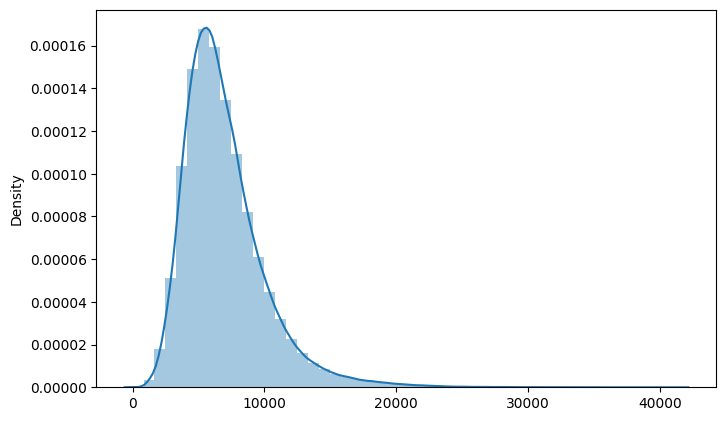

In [42]:
#distribution plot of sales
sns.distplot(x=df1['Sales'])

In [43]:
#Transformation
df1['Sales']=np.log(df1['Sales'])
df1.dropna(inplace=True)
df1.drop(df1[df1['Sales']==float("-inf")].index,inplace=True)

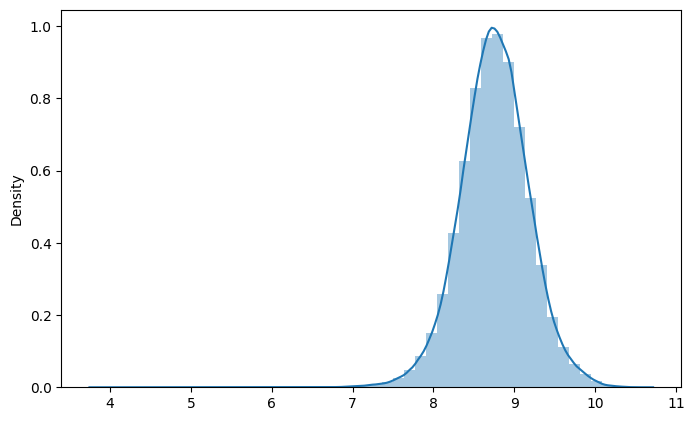

In [44]:
#Distribution plot of sales
sns.distplot(x=df1['Sales'])

In [45]:
#Changing into boolean
df1['StateHoliday'].replace({'a':1,'b':1,'c':1},inplace=True)

In [46]:
#Combining competition open since month and year into total months
df1['ComprtitionOpen']=(df1['Year']-df1['CompetitionOpenSinceYear'])*12+(df1['Month']-df1['CompetitionOpenSinceMonth'])
#Correcting the negative Values
df1['ComprtitionOpen']=df1['ComprtitionOpen'].apply(lambda x:0 if x<0 else x)
#Droping both the columns
df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [47]:
#Changing promo2 features into meaningful inputs
#Combining promo2 to total months
df1['Promo2Open']=(df1['Year']-df1['Promo2SinceYear'])*12+(df1['WeekOfYear']-df1['Promo2SinceWeek'])*0.230137
#Correcting the negative values
df1['Promo2Open']=df1['Promo2Open'].apply(lambda x:0 if x<0 else x)*df1['Promo2']


In [48]:
#Creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(df):
  month_dict={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
  try:
    months=df['PromoInterval'].split(',')
    if df['Month'] and month_dict[df['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

In [49]:
#Applying
df1['Promo2running']=df1.apply(promo2running,axis=1)*df1['Promo2']

In [50]:
#Droping unnecessary columns
df1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'], axis=1,inplace=True)

In [51]:
#setting date and store as index
df1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df1.sort_index(inplace=True)

In [52]:
df1.head()

DayOfWeek     Sales  Customers  Promo  StateHoliday  \
Date       Store                                                        
2013-01-01 85             2  8.347590        619      0             1   
           259            2  8.832150       1444      0             1   
           262            2  9.756552       2875      0             1   
           274            2  8.039802        729      0             1   
           335            2  7.783641        482      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  \
Date       Store                                               
2013-01-01 85          0  2013      1           1          1   
           259         0  2013      1           1          1   
           262         0  2013      1           1          1   
           274         1  2013      1           1          1   
           335         1  2013      1           1          1   

                  Avg_Customer_Sales  ComprtitionOpen  Promo2Open  \
Date       Store                                                    
2013-01-01 85               6.817447             15.0         0.0   
           259              4.744460              0.0         0.0   
           262              6.005913              0.0         0.0   
           274              4.255144              0.0         0.0   
           335              4.981328              0.0         0.0   

                  Promo2running  
Date       Store                 
2013-01-01 85                 0  
           259                0  
           262                0  
           274                1  
           335                1

<h4>Outlier Detection</h4>
<h5>Outlier and Z-Score</h5>
<p>In statistics an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicates either measurement error or that the population has a heavy-tailed distibution.</p>
<p>Z-Score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-Score tells how many standard deviation away a given observation is from the mean.</p>

z=(x-Mean)/Standard Deviation

Total Number of outliers present in the sales column are 1559


[Text(0.5, 1.0, 'Outliers Distribution')]

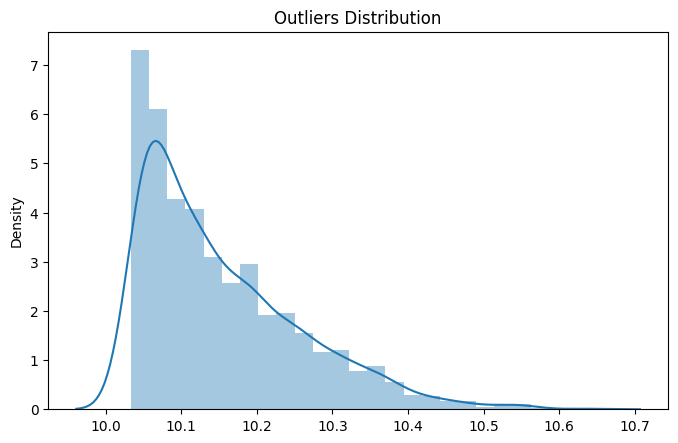

In [53]:
#code to separate outliers
mean_sales=np.mean(df1['Sales'])
sd_sales=np.std(df1['Sales'])
#more than 3 standard deviation is an outlier
threshold=3
#code to identify them
outliers=[]
for value in df1['Sales']:
  z_score=(value-mean_sales)/sd_sales
  if z_score>threshold:
    outliers.append(value)
#total numebr of outliers
print(f"Total Number of outliers present in the sales column are {len(outliers)}")
#plot the outlier distribution
sns.distplot(x=outliers).set(title="Outliers Distribution")

The data points with sales value higher than 10.2 are very low and hence they can be considered as outliers.

In [54]:
#percentage of sales greater than 10.2
sales_outliers=df1.loc[df1['Sales']>10.2]
percentage_of_outliers=(len(sales_outliers)/len(df1))*100
print(f'The percentage of observation of sales greater then 28000 are {percentage_of_outliers}')

The percentage of observation of sales greater then 28000 are 0.050809036191667316


In [55]:
sales_outliers

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,Avg_Customer_Sales,ComprtitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,,
2013-01-07,817,1,10.381676,4065,1,0,0,a,a,140.0,0,2013,1,2,7,7.936777,82.0,0.0,0
2013-01-08,817,2,10.241744,3862,1,0,0,a,a,140.0,0,2013,1,2,8,7.263076,82.0,0.0,0
2013-01-21,817,1,10.330942,3900,1,0,0,a,a,140.0,0,2013,1,4,21,7.863333,82.0,0.0,0
2013-01-22,817,2,10.210605,7388,1,0,0,a,a,140.0,0,2013,1,4,22,3.680292,82.0,0.0,0
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,2,5,34,6.979006,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-13,1114,1,10.245516,3592,1,0,0,a,c,870.0,0,2015,7,29,194,7.838530,22.0,0.0,0
2015-07-19,262,7,10.362967,4691,0,0,0,b,a,1180.0,0,2015,7,29,200,6.750160,26.0,0.0,0
2015-07-26,262,7,10.390440,4783,0,0,0,b,a,1180.0,0,2015,7,30,207,6.804725,26.0,0.0,0


<h4>Observations:</h4>
some interesting insights can be drawn from these outliers dataframe.
<li>First thing that comes to notice is the DayOfWeek for store 262. its sunday and it has high sales and its of the store type B.</li>
<li>All other data points had promotion going on and they had a high number of customers as well indicating no absurd behavior.</li>
<li>It can be well established that the outliers are showing this behavior for the store with promotion=1 and store type B. It would not be wise to treat them because the reasons behind this behaviour seems fair.</li>

In [56]:
#Lets see which stores were open on sunday in the outlier dataframe
sales_outliers.loc[sales_outliers['DayOfWeek']==7]

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,Avg_Customer_Sales,ComprtitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,,
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,2,5,34,6.979006,0.0,0.0,0
2013-02-10,262,7,10.209280,4133,0,0,0,b,a,1180.0,0,2013,2,6,41,6.570046,0.0,0.0,0
2013-03-03,262,7,10.280210,4314,0,0,0,b,a,1180.0,0,2013,3,9,62,6.757070,0.0,0.0,0
2013-03-10,262,7,10.207068,4130,0,0,0,b,a,1180.0,0,2013,3,10,69,6.560291,0.0,0.0,0
2013-03-17,262,7,10.247822,4204,0,0,0,b,a,1180.0,0,2013,3,11,76,6.712892,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-28,262,7,10.268721,4450,0,0,0,b,a,1180.0,0,2015,6,26,179,6.475730,25.0,0.0,0
2015-07-05,262,7,10.317417,4762,0,0,0,b,a,1180.0,0,2015,7,27,186,6.353423,26.0,0.0,0
2015-07-12,262,7,10.381924,4623,0,0,0,b,a,1180.0,0,2015,7,28,193,6.980532,26.0,0.0,0


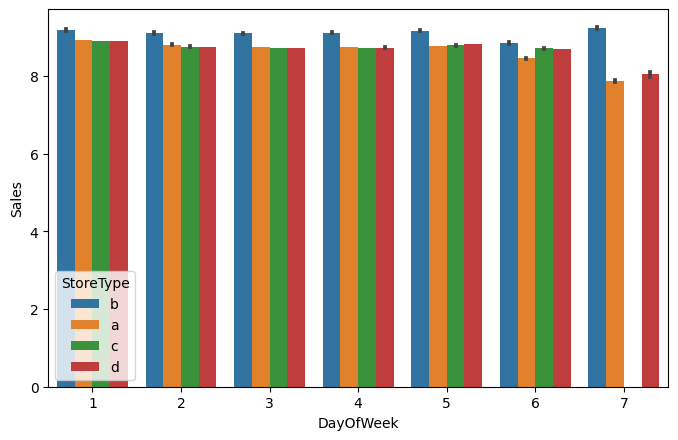

In [57]:
#lets explore store type and day of week
sns.barplot(x=df1['DayOfWeek'],y=df1['Sales'],hue=df1['StoreType'])

In [58]:
#lets varify in the full dataset
df1.loc[(df1['DayOfWeek']==7)&(df1['StoreType']=='b')]

DayOfWeek      Sales  Customers  Promo  StateHoliday  \
Date       Store                                                         
2013-01-06 85             7   9.259987       1509      0             0   
           259            7   8.977904       1686      0             0   
           262            7  10.053630       3479      0             0   
           274            7   8.243283        932      0             0   
           335            7   8.883640       1310      0             0   
...                     ...        ...        ...    ...           ...   
2015-07-26 733            7   9.691037       3352      0             0   
           769            7   9.312446       2783      0             0   
           948            7   9.395990       2346      0             0   
           1081           7   8.659734        875      0             0   
           1097           7   9.496045       2710      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-06 85                 0         b          a               1870.0   
           259                1         b          b                210.0   
           262                0         b          a               1180.0   
           274                1         b          b               3640.0   
           335                0         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-26 733                0         b          b                860.0   
           769                0         b          b                840.0   
           948                0         b          b               1430.0   
           1081               0         b          a                400.0   
           1097               0         b          b                720.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  \
Date       Store                                               
2013-01-06 85          0  2013      1           1          6   
           259         0  2013      1           1          6   
           262         0  2013      1           1          6   
           274         1  2013      1           1          6   
           335         1  2013      1           1          6   
...                  ...   ...    ...         ...        ...   
2015-07-26 733         0  2015      7          30        207   
           769         1  2015      7          30        207   
           948         0  2015      7          30        207   
           1081        0  2015      7          30        207   
           1097        0  2015      7          30        207   

                  Avg_Customer_Sales  ComprtitionOpen  Promo2Open  \
Date       Store                                                    
2013-01-06 85               6.964215             15.0    0.000000   
           259              4.701068              0.0    0.000000   
           262              6.680080              0.0    0.000000   
           274              4.079399              0.0    0.000000   
           335              5.506107              0.0    0.000000   
...                              ...              ...         ...   
2015-07-26 733              4.824582            189.0    0.000000   
           769              3.979519             22.0   31.857534   
           948              5.132140             22.0    0.000000   
           1081             6.589714            112.0    0.000000   
           1097             4.910332            160.0    0.000000   

                  Promo2running  
Date       Store                 
2013-01-06 85                 0  
           259                0  
           262                0  
           274                1  
           335                1  
...                         ...  
2015-07-26 733                0  
           769  

<h4>Observation:</h4>
<li>This suggest that store type b had high sales almost all week. No store of the c was open on sunday.</li>
<li>Being open 24*7 along with all kinds of assortment available is probably the reason why it had higher average sales than any other store type.</li>